In [ ]:
import polars as pl


In [ ]:
# Define the data types for the columns to avoid parsing errors
dtypes_tax_df = {
    'fair_market_val': pl.Float64,  # Ensure fair_market_val is read as a float
    # Add other columns with specific data types if needed
}

dtypes_tax_df2 = {
    'fair_market_val': pl.Float64,  # Ensure fair_market_val is read as a float
    # Add other columns with specific data types if needed
}

In [ ]:

# Load the data using Polars with specified data types
tax_df = pl.read_csv("/teamspace/uploads/tax_data.csv", schema_overrides=dtypes_tax_df)
tax_df2 = pl.read_csv("data/tax_parcels_data.csv", schema_overrides=dtypes_tax_df2)


In [ ]:
# Select only 'physical_address' and 'the_geom' from the second dataframe
tax_df2_filtered = tax_df2.select(['physical_address', 'the_geom'])

# Merge the dataframes on 'parcel_address'
merged_df = tax_df.join(tax_df2_filtered, left_on='parcel_address', right_on='physical_address', how='left')

# Convert back to pandas dataframe if needed
merged_df_pd = merged_df.to_pandas()

merged_df_pd.to_csv("data/merged_tax_and_parcel.csv")


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import json
import ast

# Assuming merged_df_pd is already created from the previous steps

# Filter out rows where 'the_geom' is None
merged_df_pd = merged_df_pd.dropna(subset=['the_geom'])

# Create the 'geometry' column
def create_geometry(geom):
    try:
        # If geom is a string, convert it to a dictionary
        if isinstance(geom, str):
            geom = json.loads(geom)
        return shape(geom)
    except Exception as e:
        print(f"Error creating geometry for geom '{geom}': {e}")
        return None

merged_df_pd['geometry'] = merged_df_pd['the_geom'].apply(create_geometry)

# Drop rows where 'geometry' is None (if any)
merged_df_pd = merged_df_pd.dropna(subset=['geometry'])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df_pd, geometry='geometry')

# Set the coordinate reference system (CRS) if known, for example, WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# If you have a shapefile of East Baton Rouge Parish, you can overlay it
# Load the parish boundary shapefile
# ebr_parish = gpd.read_file('path_to_shapefile.shp')

# Plot the parish boundaries
# ebr_parish.plot(ax=ax, color='none', edgecolor='black')

plt.title('Map of East Baton Rouge Parish with Parcel Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


NameError: name 'merged_df_pd' is not defined

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import json
import ast

merged_df_pd = pd.read_csv("data/merged_tax_and_parcel.csv")
# Create the 'geometry' column
# Create the 'geometry' column
merged_df_pd = merged_df_pd.dropna(subset=['the_geom'])
def create_geometry(geom):
    try:
        # If geom is a string, convert it to a dictionary
        if isinstance(geom, str):
            geom = ast.literal_eval(geom)
        return shape(geom)
    except Exception as e:
        print(f"Error creating geometry for geom '{geom}': {e}")
        return None

merged_df_pd['geometry'] = merged_df_pd['the_geom'].apply(create_geometry)



/tmp/ipykernel_2786/2850136449.py:8: DtypeWarning: Columns (10,18,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df_pd = pd.read_csv("data/merged_tax_and_parcel.csv")


In [3]:
# Display the first few rows of the 'the_geom' column
print(merged_df_pd['geometry'].head())


1    MULTIPOLYGON (((-91.00727806813 30.34411076570...
3    MULTIPOLYGON (((-91.155182315812 30.6002415985...
4    MULTIPOLYGON (((-91.161899497003 30.5775196673...
5    MULTIPOLYGON (((-91.163929767202 30.6444963470...
6    MULTIPOLYGON (((-91.178675257253 30.5799736129...
Name: geometry, dtype: object


In [4]:
merged_df_pd = merged_df_pd.dropna(subset=['geometry'])

In [5]:
merged_df_pd.to_csv("data/merged_tax_and_parcel_with_geometry.csv", index=False)

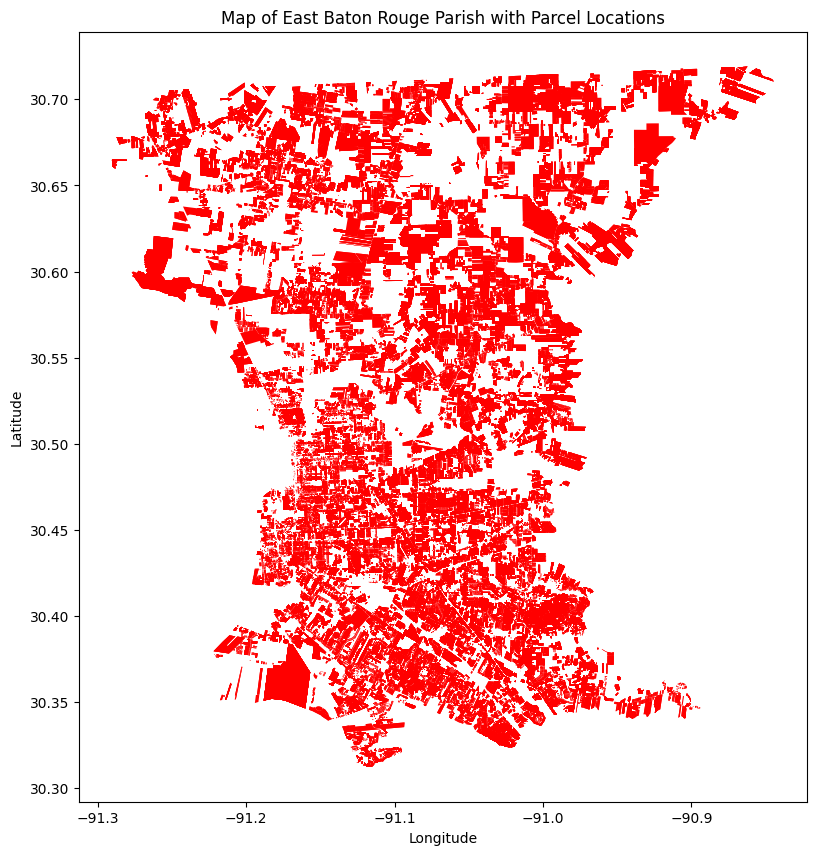

In [6]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df_pd, geometry='geometry')

# Set the coordinate reference system (CRS) if known, for example, WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# If you have a shapefile of East Baton Rouge Parish, you can overlay it
# Load the parish boundary shapefile
# ebr_parish = gpd.read_file('path_to_shapefile.shp')

# Plot the parish boundaries
# ebr_parish.plot(ax=ax, color='none', edgecolor='black')

plt.title('Map of East Baton Rouge Parish with Parcel Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
